# Precision and Ground Truth Edges vs. Threshold

This notebook will look at how the threshold value effects the prune ratio and the amount of ground truth edges in the tour predicted by a model.

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import model_utils as M

import seaborn as sns
import matplotlib.pyplot as plt

Load in the models.

In [2]:
TSP_NB = joblib.load('Models/TSP_NB_model.pkl')
TSP_LR = joblib.load('Models/TSP_LR_model.pkl')
TSP_RF = joblib.load('Models/TSP_RF_model.pkl')

Load the test data.

In [3]:
DATA_DIR = '../6_feature_engineering/Feature_Dataset/'
data_files = [i for i in os.listdir(DATA_DIR) if i.endswith('.csv')]
data_files.sort()
df_TSP_list = [pd.read_csv(DATA_DIR + file) for file in data_files]

for i in range(len(df_TSP_list)):
    # Convert booleans to int
    df_TSP_list[i] = df_TSP_list[i].astype({'IS_IN_1ST_QUARTILE': 'int64',
                                            'IS_IN_2ND_QUARTILE': 'int64',
                                            'IS_IN_3RD_QUARTILE': 'int64',
                                            'EDGE_IN_SOL': 'int64'})
    df_TSP_list[i] = df_TSP_list[i].reset_index(drop=True)
    
train_set = df_TSP_list[:5]
test_set = df_TSP_list[5:]

test_set[0].shape

(499500, 8)

Load the coordinates for the test data.

In [4]:
COORD_DATA_DIR = '../5_ground_truth/Final_Dataset/'
coord_datafiles = [i for i in os.listdir(COORD_DATA_DIR) if i.endswith('.csv')]
coord_datafiles.sort()

df_coord_list = [pd.read_csv(COORD_DATA_DIR + file) for file in coord_datafiles]

for i in range(len(df_coord_list)):
    df_coord_list[i]['NODE1_COORDS'] = df_coord_list[i]['NODE1_COORDS'].apply(eval)
    df_coord_list[i]['NODE2_COORDS'] = df_coord_list[i]['NODE2_COORDS'].apply(eval)

train_coords = df_coord_list[:5]
test_coords = df_coord_list[5:]

test_coords[0].shape

(499500, 7)

Constant variables.

In [5]:
set_num = 0 # For changing between different test graphs
cols = test_set[set_num].columns[:-1]  # Every column except the last one

## Naïve Bayes Threshold Testing

In [7]:
NB_precisions = np.array([])
NB_ground_truth_count = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_NB, threshold=t)
    NB_precisions = np.append(NB_precisions, M.precision(tour))
    NB_ground_truth_count = np.append(NB_ground_truth_count, M.ground_truth_count(tour))

print("Naïve Bayes")
print("Average Precision: {}".format(NB_precisions))
print("Average Ground Truth Count: {}".format(NB_ground_truth_count))

Naïve Bayes
Average Precision: [0.01524586 0.10384696 0.10635091 0.10794275 0.1091954  0.11039106
 0.11144952 0.11260543 0.11370699 0.11424933 0.11508862 0.11565982
 0.11688004 0.11806969 0.1191109  0.12031727 0.12169835 0.12349699
 0.12621608 0.13091441 1.        ]
Average Ground Truth Count: [999. 988. 988. 988. 988. 988. 988. 988. 988. 987. 987. 986. 986. 986.
 986. 986. 986. 986. 986. 985.   0.]


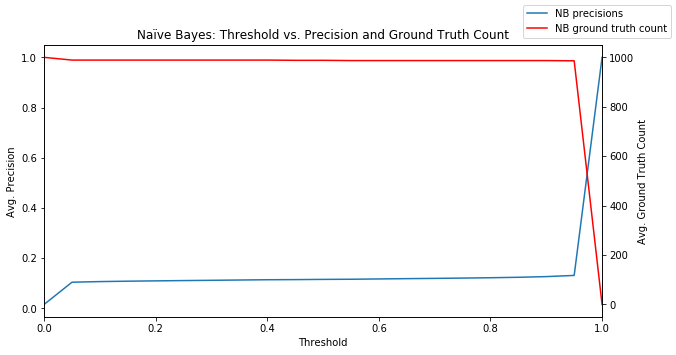

In [9]:
df = pd.DataFrame({"Threshold": np.arange(0, 1+step, step),
                   "NB precisions": NB_precisions, 
                   "NB ground truth count": NB_ground_truth_count})

ax = df.plot(x="Threshold", y="NB precisions", legend=False, figsize=(10,5))
ax2 = ax.twinx()
df.plot(x="Threshold", y="NB ground truth count", ax=ax2, legend=False, color="r")
ax.figure.legend()

plt.title("Naïve Bayes: Threshold vs. Precision and Ground Truth Count")
ax.set_ylabel('Avg. Precision')
ax2.set_ylabel('Avg. Ground Truth Count')
plt.show()

## Logistic Regression Threshold Testing

In [10]:
LR_precisions = np.array([])
LR_ground_truth_count = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_LR, threshold=t)
    LR_precisions = np.append(LR_precisions, M.precision(tour))
    LR_ground_truth_count = np.append(LR_ground_truth_count, M.ground_truth_count(tour))
    

print("Logistic Regression")
print("Average Precision: {}".format(LR_precisions))
print("Average Ground Truth Count: {}".format(LR_ground_truth_count))

Logistic Regression
Average Precision: [0.002002   0.32728542 0.38284251 0.43746835 0.48201856 0.52431012
 0.5390411  0.59385113 0.6504298  0.6680203  0.75431607 0.7721519
 0.87326733 0.89303483 0.93220339 0.6        0.6        0.5
 0.5        1.         1.        ]
Average Ground Truth Count: [1000.  938.  897.  864.  831.  798.  787.  734.  681.  658.  568.  549.
  441.  359.  275.    3.    3.    1.    1.    1.    0.]


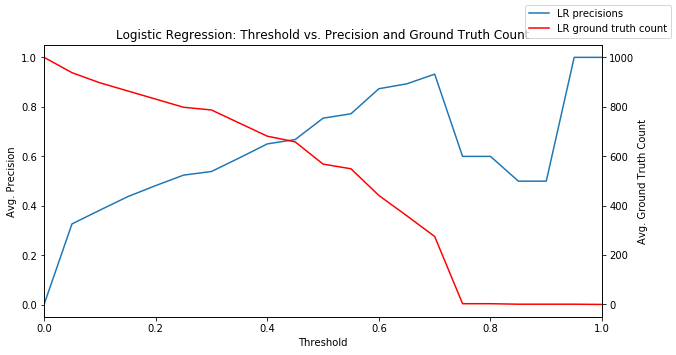

In [11]:
df = pd.DataFrame({"Threshold": np.arange(0, 1+step, step),
                   "LR precisions": LR_precisions, 
                   "LR ground truth count": LR_ground_truth_count})

ax = df.plot(x="Threshold", y="LR precisions", legend=False, figsize=(10,5))
ax2 = ax.twinx()
df.plot(x="Threshold", y="LR ground truth count", ax=ax2, legend=False, color="r")
ax.figure.legend()

plt.title("Logistic Regression: Threshold vs. Precision and Ground Truth Count")
ax.set_ylabel('Avg. Precision')
ax2.set_ylabel('Avg. Ground Truth Count')
plt.show()

## Random Forest Threshold Testing

In [12]:
RF_precisions = np.array([])
RF_ground_truth_count = np.array([])


X = test_set[set_num][cols].values

step = 0.05
for t in np.arange(0, 1+step, step):
    tour = M.threshold_tour(X, test_coords[set_num], TSP_RF, threshold=t)
    RF_precisions = np.append(RF_precisions, M.precision(tour))
    RF_ground_truth_count = np.append(RF_ground_truth_count, M.ground_truth_count(tour))


print("Random Forest")
print("Average Precision: {}".format(RF_precisions))
print("Average Ground Truth Count: {}".format(RF_ground_truth_count))

Random Forest
Average Precision: [0.002002   0.35517891 0.44069479 0.50533808 0.55904437 0.59606657
 0.64452114 0.692      0.74655963 0.77150193 0.79750347 0.82908546
 0.85619835 0.86740331 0.88659794 0.9047619  0.91256831 0.92380952
 0.94672131 0.94219653 1.        ]
Average Ground Truth Count: [1000.  943.  888.  852.  819.  788.  747.  692.  651.  601.  575.  553.
  518.  471.  430.  380.  334.  291.  231.  163.    0.]


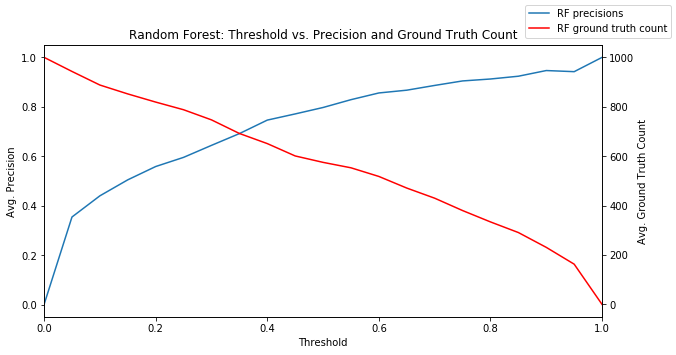

In [13]:
df = pd.DataFrame({"Threshold": np.arange(0, 1+step, step),
                   "RF precisions": RF_precisions, 
                   "RF ground truth count": RF_ground_truth_count})

ax = df.plot(x="Threshold", y="RF precisions", legend=False, figsize=(10,5))
ax2 = ax.twinx()
df.plot(x="Threshold", y="RF ground truth count", ax=ax2, legend=False, color="r")
ax.figure.legend()

plt.title("Random Forest: Threshold vs. Precision and Ground Truth Count")
ax.set_ylabel('Avg. Precision')
ax2.set_ylabel('Avg. Ground Truth Count')
plt.show()